<a href="https://colab.research.google.com/github/Azwraithz/Coderhouse-DataScience-C77695/blob/main/ProyectoDS_Parte1_Morales_Luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract**

El presente proyecto se centra en el análisis exploratorio sobre el **Comportamiento de Compras de Clientes**, utilizando un dataset que combina información demográfica, características de los productos adquiridos, variables de temporada, talles y precios. El propósito es detectar patrones relevantes, relaciones entre variables y posibles anomalías que ayuden a comprender mejor los factores que influyen en las decisiones de consumo. A través de técnicas de limpieza de datos, estadísticas descriptivas y visualizaciones, se construye un panorama inicial que permite evaluar la calidad de la información y extraer hallazgos significativos.

Más allá de describir las tendencias, el análisis busca aportar una mirada práctica orientada al negocio, identificando diferencias en hábitos de compra entre grupos de clientes, variaciones según temporada y productos más representativos. Estos resultados funcionan como insumos para la toma de decisiones estratégicas, así como para futuros procesos de segmentación y modelado predictivo, fortaleciendo la capacidad de anticipar comportamientos y diseñar acciones más efectivas de marketing y fidelización.

## Preguntas de interés / Hipótesis


1. ¿Qué caracteristicas poseen los clientes que participan en este relevamiento?
2. ¿Qué edad poseen? ¿Hay un género con mayor participación? ¿Localidad a la que pertenecen?
3. ¿Qué comportamiendo presentan los clientes por temporadas?
4. ¿Cómo se relaciona la frecuencia de compras?
5. ¿Cualés son los medios de pagos mas utilizados y en que temporada?
6. ¿Qué localidades presentan un mayor consumo?
7. ¿Cuál fue el articulo más comprado por los clientes?




In [72]:
# Importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
# Lectura de archivo CSV
df = pd.read_csv('/content/tendencia_de_compras.csv')

In [74]:
# Análisis exploratorios de la estructura
print('Dimensión del DataFrame: ', df.shape)
print('Nombre de columnas:', df.columns)

Dimensión del DataFrame:  (3900, 19)
Nombre de columnas: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [75]:
# Renombrar columnas para eliminar espacios o guiones medios
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_Of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [76]:
# Análisis exploratorios de la estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_(USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [77]:
# Análisis exploratorios de la estructura
df.dtypes

,0
Customer_ID,int64
Age,int64
Gender,object
Item_Purchased,object
Category,object
Purchase_Amount_(USD),int64
Location,object
Size,object
Color,object
Season,object


In [78]:
# Análisis exploratorios de la estructura
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_Of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [79]:
# Análisis exploratorios de estadísticas
df.describe()

,Customer_ID,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [80]:
# Análisis exploratorios de estadísticas
df.describe(include="O")

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_Of_Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [81]:
# Análisis exploratorios de estadísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase_Amount_(USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [82]:
# Análisis exploratorios de estadísticas - Valores únicos por columna
df.nunique()

,0
Customer_ID,3900
Age,53
Gender,2
Item_Purchased,25
Category,4
Purchase_Amount_(USD),81
Location,50
Size,4
Color,25
Season,4


In [83]:
# Análisis exploratorios de estadísticas - Para corroborar algun campo necesario
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [84]:
# Análisis exploratorios - Valores faltantes - Por columna
df.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
Item_Purchased,0
Category,0
Purchase_Amount_(USD),0
Location,0
Size,0
Color,0
Season,0


In [85]:
# Análisis exploratorios - Valores faltantes - Porcentajes de nulos
df.isna().mean ()

,0
Customer_ID,0.0
Age,0.0
Gender,0.0
Item_Purchased,0.0
Category,0.0
Purchase_Amount_(USD),0.0
Location,0.0
Size,0.0
Color,0.0
Season,0.0


In [86]:
# Análisis exploratorios - Valores faltantes - Cantidad de filas duplicadas
print('Cantidad de registros duplicados:', df.duplicated().sum())

Cantidad de registros duplicados: 0


En este punto se confirma que el conjunto de datos está limpio, es consistente y está listo para un posterior análisis.

# Análisis demográfico de clientes



In [87]:
# Conteo de clientes categorizados por género:
df['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


In [88]:
# Distribución por género
df['Gender'].value_counts(normalize=True) * 100

,proportion
Gender,
Male,68.0
Female,32.0


In [89]:
# Promedio de edad de los clientes
average_age = df["Age"].mean()

In [90]:
# Distribución de clientes por rangos etarios
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

df["AgeGroup"].value_counts(normalize=True) * 100

,proportion
AgeGroup,
46-55,19.307692
56-65,19.230769
26-35,19.025641
36-45,18.692308
16-25,14.641026
65+,9.102564


In [91]:
# TOP 10 de localidades a las que pertenecen los clientes
df['Location'].value_counts().head(10)

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


In [92]:
# Edad promedio por género de los clientes
df.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,44.007212
Male,44.097285


In [93]:
# Edad promedio por localidad
df.groupby('Location')['Age'].mean().sort_values(ascending=False)

,Age
Location,
Louisiana,48.154762
Indiana,48.050633
South Carolina,47.500000
Connecticut,47.320513
Maryland,46.895349
Ohio,46.532468
Rhode Island,46.476190
Wisconsin,45.973333
Missouri,45.740741


## Conclusiones del análisis demográfico

En este dataset participan de 3.900 clientes de los cuales:

*   Masculinos: 2.652 clientes (68%)
*   Femeninos: 1.248 clientes (32%)

Cliente más joven: 18 años

Clientes de mayor edad: 70 años

La edad promedio de ellos es: 44 años

Se distribuyen de la siguiente formas de acuerdo a los siguientes rangos etarios:

*   16-25: 14.64%
*   26-35: 19.02%
*   36-45: 18.69%
*   46-55: 19.30%
*   56-65: 19.23%
*   65+: 9.10%

TOP 10 de localidades a las que pertenecen los clientes:

1.   Montana:	96
2.   California: 95
3.   Idaho: 93
4.   Illinois: 92
5.   Alabama: 89
6.   Minnesota:	88
7.   New York:	87
8.   Nevada:	87
9.   Nebraska:	87
10.   Delaware:	86

Las caracteristicas de edad y género de los clientes se representan en los siguientes gráficos:

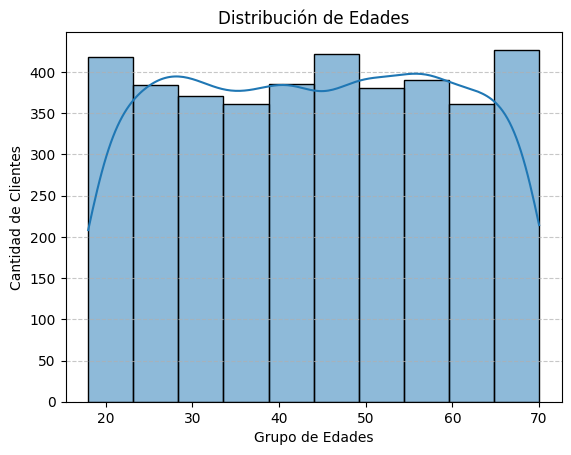

In [94]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribución de Edades")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

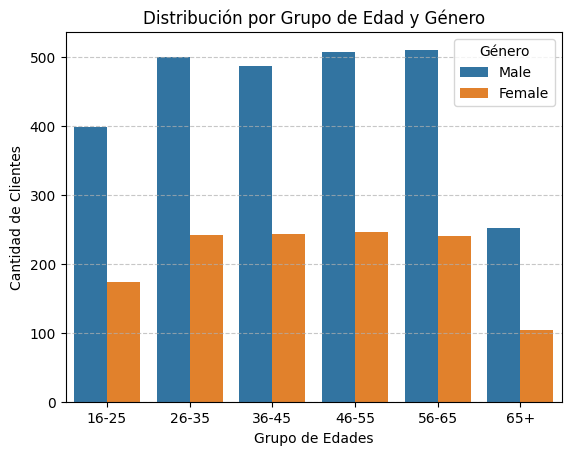

In [95]:
sns.countplot(x="AgeGroup", hue="Gender", data=df)
plt.title("Distribución por Grupo de Edad y Género")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.legend(title="Género")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

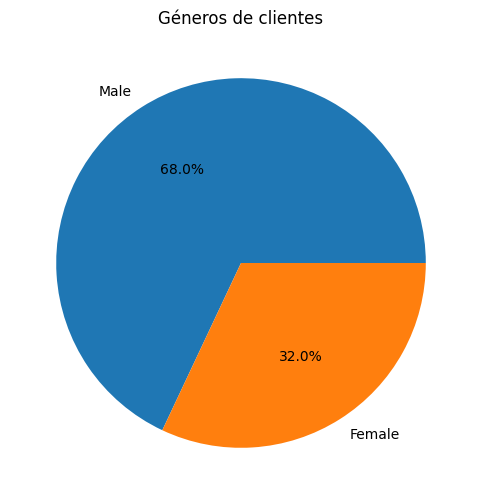

In [96]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%')
plt.title('Géneros de clientes')
plt.show()

# Análisis de Comportamiento de compras por temporada
Identificando patrones y tendencias de consumo para optimizar estrategias comerciales según la estación del año.

In [97]:
# Ventas por temporadas (Precios en dolares)
ventas = df.groupby("Season")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas)

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase_Amount_(USD), dtype: int64


In [98]:
# Resumen de montos de acuerdo al metodo de pago
pagos = df["Payment_Method"].value_counts()
print(pagos)

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


In [99]:
# Matriz que combina la temporada y monto pagado por cada método de pago
matriz_pago_temporada = df.pivot_table(
    index="Season",
    columns="Payment_Method",
    values="Purchase_Amount_(USD)",
    aggfunc="sum",
    fill_value=0
)

print(matriz_pago_temporada)

Payment_Method  Bank Transfer   Cash  Credit Card  Debit Card  PayPal  Venmo
Season                                                                      
Fall                     9422   9489        11411       10283    9900   9513
Spring                  10404  10064        10510        8589    8850  10262
Summer                   9083   9459         9084        8923    9227  10001
Winter                   8214   9821        11562        9323    9472  10215


In [100]:
# Media de compras previas vs Frecuencia
frecuencias = df.groupby("Frequency_Of_Purchases")["Previous_Purchases"].agg(["count","mean","median"]).sort_values(by="mean", ascending=False)
print(frecuencias)


                        count       mean  median
Frequency_Of_Purchases                          
Quarterly                 563  26.854352    28.0
Weekly                    539  25.771800    26.0
Monthly                   553  25.278481    25.0
Fortnightly               542  25.271218    26.0
Every 3 Months            584  24.960616    24.0
Bi-Weekly                 547  24.787934    24.0
Annually                  572  24.561189    24.0


In [101]:
# Top de localidades con mayor consumo
locations = df.groupby("Location")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False).head(5)
print(locations)

Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase_Amount_(USD), dtype: int64


<Axes: title={'center': 'Ventas totales por temporada (USD)'}, xlabel='Season'>

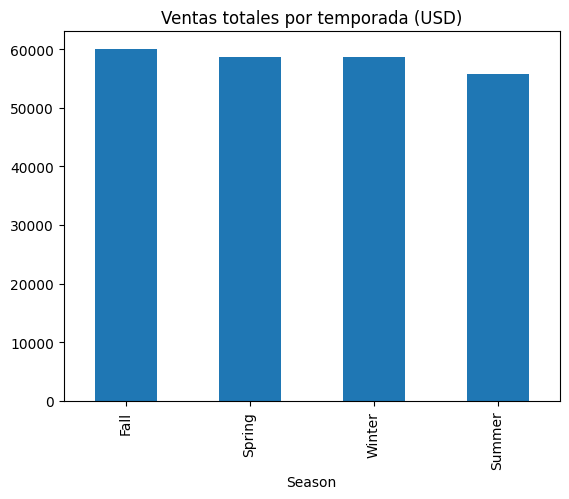

In [102]:
ventas.plot(kind="bar", title="Ventas totales por temporada (USD)")

<Axes: title={'center': 'Métodos de pagos más utilizados'}, xlabel='Payment_Method'>

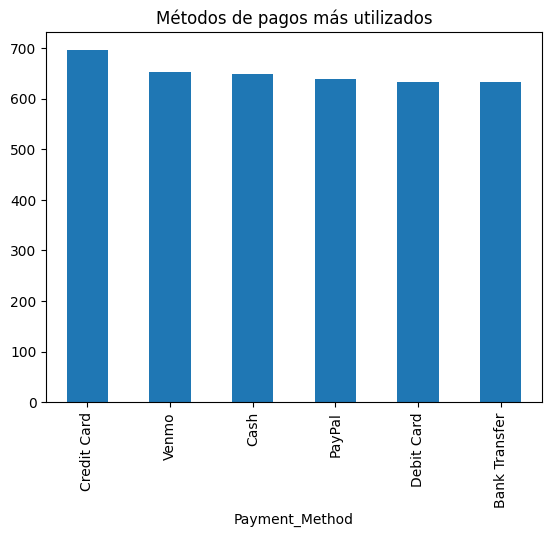

In [103]:
pagos.plot(kind="bar", title="Métodos de pagos más utilizados")

<Axes: title={'center': 'Media de compras previas vs Frecuencia'}, xlabel='Frequency_Of_Purchases'>

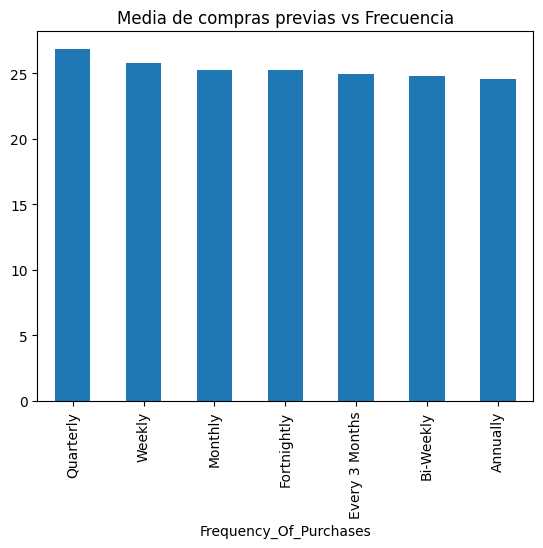

In [104]:
frecuencias["mean"].plot(kind="bar", title="Media de compras previas vs Frecuencia")

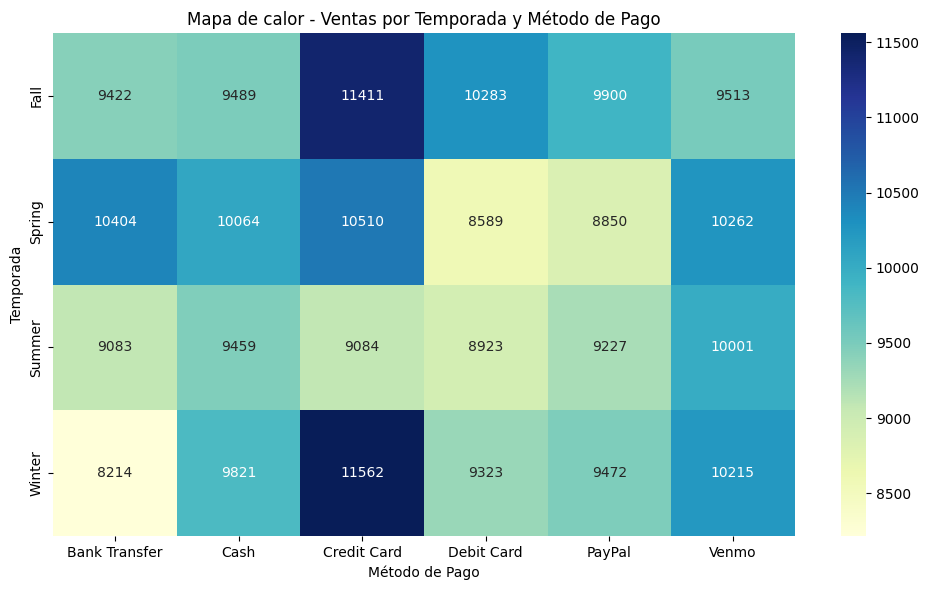

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(
    matriz_pago_temporada,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)

plt.title("Mapa de calor - Ventas por Temporada y Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Temporada")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 5 Locations by Total Purchase Amount (USD)'}, xlabel='Location'>

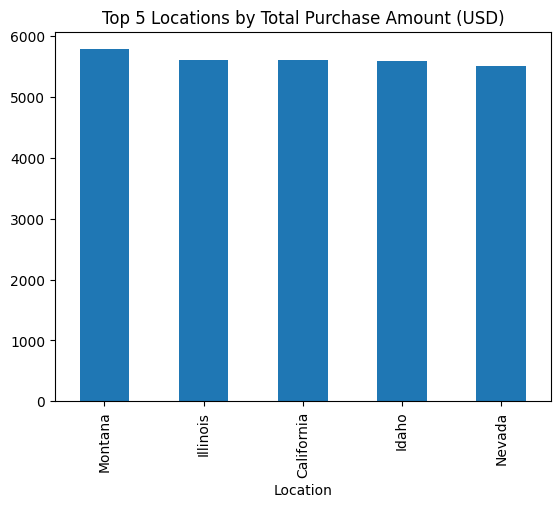

In [106]:
locations.plot(kind="bar", title="Top 5 Locations by Total Purchase Amount (USD)")

## Conclusiones del análisis de comportamiento

Se tienen en cuenta datos que revela patrones significativos en el comportamiento de compra según temporadas, métodos de pago, frecuencias de compra y ubicaciones geográficas.

* ### Ventas por Temporada

La temporada de otoño registra el mayor volumen de ventas con 60.018 USD, seguida de cerca por primavera 58.679 USD y invierno 58.607 USD, mientras que el verano presenta el menor monto con 55.777 USD. Esto sugiere una mayor actividad comercial en otoño, posiblemente influenciada por eventos estacionales como el regreso a clases o festividades.

* ### Métodos de Pago

La tarjeta de crédito es el método de pago más utilizado (696 transacciones), seguido por Venmo (653) y efectivo (648). Sin embargo, la distribución es relativamente equilibrada entre los métodos, indicando una adopción diversa de opciones de pago. No se observan diferencias drásticas en el uso de métodos electrónicos versus tradicionales.

* ### Ventas por Temporada y Método de Pago

La matriz de pagos por temporada muestra que la tarjeta de crédito lidera en otoño 11.411 USD y invierno 11.562 USD, mientras que Venmo y efectivo tienen un uso notable en primavera 10.262 USD y 10.064 USD, respectivamente. El método de transferencia bancaria muestra menor uso en invierno 8.214 USD, lo que podría indicar preferencias estacionales en el uso de ciertos métodos.

* ### Frecuencia de Compras y Compras Previas

Los clientes que compran trimestralmente tienen el promedio más alto de compras previas (26.85), mientras que los compradores anuales tienen el menor promedio (24.56). Esto sugiere que los clientes más frecuentes tienden a acumular más compras previas, aunque la mediana permanece relativamente estable (24-28), indicando una distribución simétrica en el comportamiento de compra.

* ### Localidades con Mayor Consumo

Montana lidera el consumo total con $5,784, seguida por Illinois 5.617 USD, California 5.605 USD, Idaho 5.587 USD y Nevada 5.514 USD. La proximidad en los montos sugiere una distribución geográfica equilibrada del gasto, con Montana destacando como el mercado más activo.

En resumen, el análisis destaca la importancia del otoño como temporada clave para las ventas, la preferencia por tarjetas de crédito y métodos electrónicos como Venmo, y la relevancia de Montana como mercado líder. Estos hallazgos pueden orientar estrategias comerciales, como campañas promocionales en otoño o en regiones específicas como Montana, y la optimización de métodos de pago electrónicos para maximizar la conversión.

# Análisis de las categorias de productos:

In [107]:
# Conteo total de cada categoria
df['Item_Purchased'].value_counts()

,count
Item_Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


In [108]:
# Conteo total de cada producto
conteo_productos = df['Category'].value_counts()
print(conteo_productos)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [109]:
# Total de ventas realizadas por categoria
ventas_productos = df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas_productos)

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_(USD), dtype: int64


In [110]:
# Promedio de ventas por categoria
categoria_producto = df.groupby("Category")["Purchase_Amount_(USD)"].mean().sort_values(ascending=False)
print(categoria_producto)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase_Amount_(USD), dtype: float64


In [111]:
# Conteo de compras realizadas por genero y categoria del producto
conteo_por_genero = pd.crosstab(df["Category"], df["Gender"])
print(conteo_por_genero)

Gender       Female  Male
Category                 
Accessories     392   848
Clothing        556  1181
Footwear        199   400
Outerwear       101   223


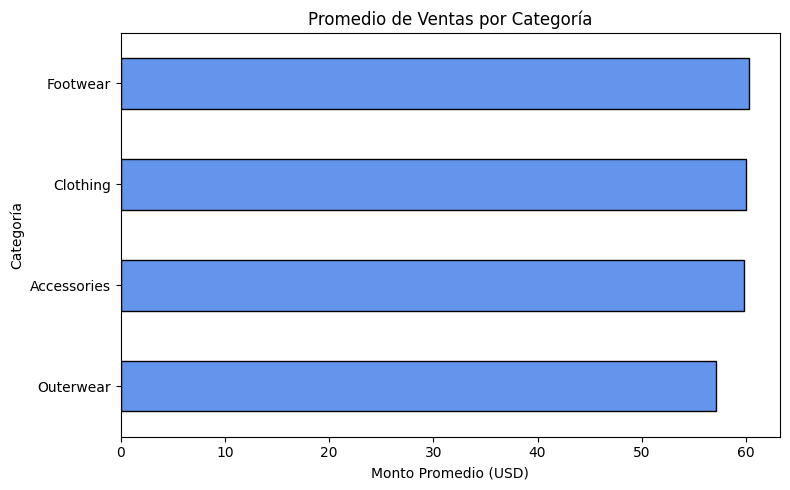

In [112]:
plt.figure(figsize=(8,5))
categoria_producto.plot(kind="barh", color="cornflowerblue", edgecolor="black")

plt.title("Promedio de Ventas por Categoría")
plt.xlabel("Monto Promedio (USD)")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

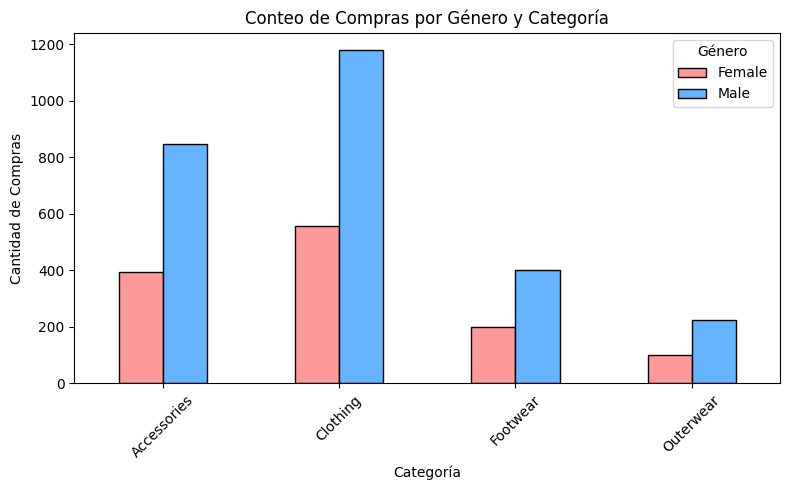

In [113]:
conteo_por_genero.plot(
    kind="bar",
    figsize=(8,5),
    color=["#ff9999", "#66b3ff"],  # Female = rosa, Male = azul
    edgecolor="black"
)

plt.title("Conteo de Compras por Género y Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.tight_layout()
plt.show()

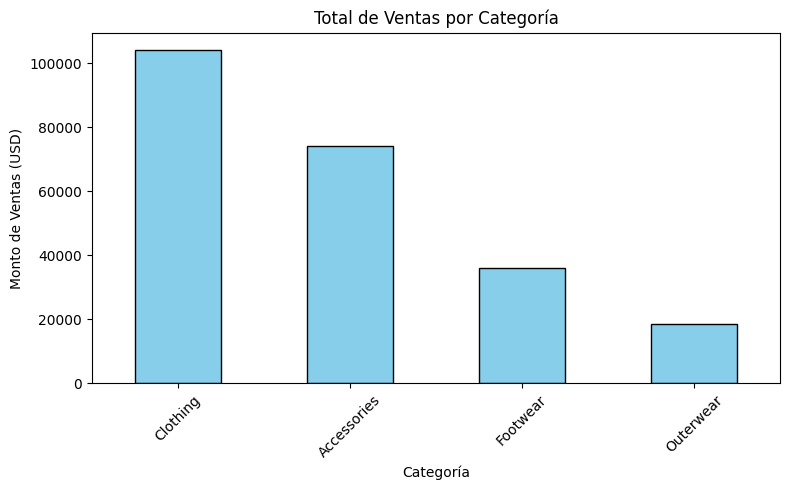

In [114]:
# Gráfico de barras
plt.figure(figsize=(8,5))
ventas_productos.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total de Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Monto de Ventas (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

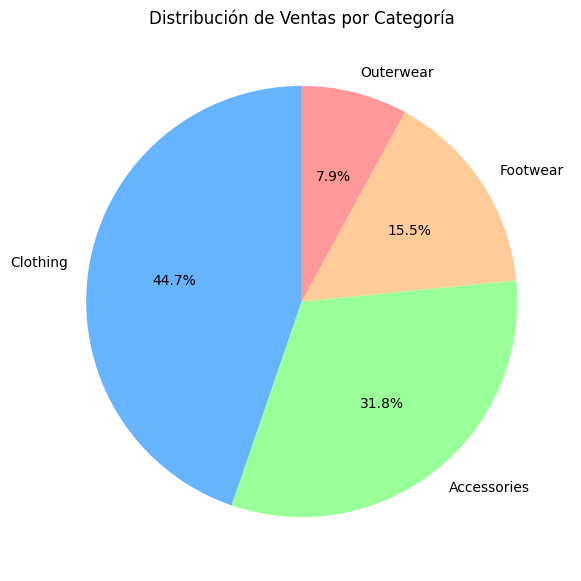

In [115]:
plt.figure(figsize=(7,7))
ventas_productos.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"]
)
plt.title("Distribución de Ventas por Categoría")
plt.ylabel("")
plt.show()

## Conclusiones del análisis de las categorias de productos

El análisis de las categorías de productos revela que Clothing lidera tanto en volumen de ventas 104.264 USD como en conteo de productos 1.737 unidades, destacando artículos como blusas, pantalones y joyería con 171 unidades cada uno.

Le sigue Accessories con 74.200 USD en ventas y 1.240 unidades, donde productos como cinturones y gafas de sol son prominentes. Footwear registra 36.093 USD en ventas de 599 unidades, con un promedio de compra más alto de 60.26 USD por unidad, mientras que Outerwear tiene el menor volumen 18.524 USD, con 324 unidades y el promedio más bajo 57.17 USD.

Por género, los hombres dominan las compras en todas las categorías, especialmente en Clothing 1.181 vs. 556 de mujeres y Accessories 848 vs. 392. Este predominio masculino sugiere una mayor demanda de productos por parte de este segmento. En general, Clothing y Footwear destacan como categorías clave por su contribución al volumen y valor de las ventas, lo que podría orientar estrategias de marketing hacia estos segmentos, especialmente hacia el público masculino.